In [13]:
import os 
os.getcwd()

'd:\\MachineLearning_Foundation'

In [14]:
import pandas as pd

df = pd.read_csv(os.getcwd()+r"\car_evaluation.csv", header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [17]:
col_names = ['buying', 'maint', "doors", "person", "lug_boot", "safety", "class"]
df.columns = col_names
df

,buying,maint,doors,person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   person    1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [19]:
df.describe()

,buying,maint,doors,person,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [23]:
for col in col_names:
    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
person
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [24]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [26]:
df.isna().sum()

buying      0
maint       0
doors       0
person      0
lug_boot    0
safety      0
class       0
dtype: int64

In [29]:
df

,buying,maint,doors,person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [30]:
x = df.drop(['class'], axis=1)
y = df[['class']]

In [31]:
x

,buying,maint,doors,person,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [32]:
y

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1723,good
1724,vgood
1725,unacc
1726,good


In [67]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=0)


In [68]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1036, 6)
(1036, 1)
(692, 6)
(692, 1)


In [69]:
!pip install category_encoders

^C


In [70]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', "doors", "person", "lug_boot", "safety"])
x_train = encoder.fit_transform(x_train)
x_train

,buying,maint,doors,person,lug_boot,safety
505,1,1,1,1,1,1
987,2,2,2,2,2,2
1532,3,3,2,1,1,3
1521,3,3,2,2,1,2
64,4,1,1,2,1,1
...,...,...,...,...,...,...
835,1,4,1,1,2,1
1216,2,4,4,3,1,1
1653,3,4,4,3,2,2
559,1,2,2,1,1,1


In [71]:
x_test = encoder.fit_transform(x_test)
x_test

,buying,maint,doors,person,lug_boot,safety
1318,1,1,1,1,1,1
124,2,2,1,2,2,1
648,3,3,1,3,3,2
249,2,3,2,3,2,2
1599,1,3,3,3,2,2
...,...,...,...,...,...,...
1081,4,3,1,3,3,1
500,3,1,4,2,1,3
10,2,1,1,2,3,1
685,3,3,2,2,3,1


In [87]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy").fit(x_train,y_train)

In [88]:
y_predict = clf.predict(x_test)

In [89]:
y_predict

array(['unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'acc', 'unacc', 'vgood', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'vgood', 'acc', 'acc', 'acc', 'unacc',
       'unacc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'vgood', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc',
 

In [90]:
print(clf.score(x_train,y_train))
clf.score(x_test,y_test)

1.0


0.661849710982659

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , confusion_matrix

confusion_matrix(y_predict, y_test)

array([[ 46,  25,  57,  25],
       [ 19,   0,   9,   0],
       [ 67,   4, 412,   3],
       [ 23,   0,   2,   0]], dtype=int64)

In [85]:
print(accuracy_score(y_predict, y_test))
print(precision_score(y_predict, y_test,average = "macro"))
print(recall_score(y_predict, y_test,average = "macro"))
print(f1_score(y_predict, y_test,average = "macro"))

0.661849710982659
0.2887768817204301
0.28709755507141127
0.28792584227366835


[Text(0.5131578947368421, 0.9666666666666667, 'x[3] <= 2.5\ngini = 0.452\nsamples = 1036\nvalue = [229, 40, 730, 37]'),
 Text(0.5, 0.9, 'x[5] <= 2.5\ngini = 0.573\nsamples = 693\nvalue = [229, 40, 387, 37]'),
 Text(0.506578947368421, 0.9333333333333333, 'True  '),
 Text(0.17763157894736842, 0.8333333333333334, 'x[5] <= 1.5\ngini = 0.424\nsamples = 464\nvalue = [106, 23, 335, 0]'),
 Text(0.16447368421052633, 0.7666666666666667, 'x[4] <= 1.5\ngini = 0.586\nsamples = 225\nvalue = [106, 23, 96, 0]'),
 Text(0.06578947368421052, 0.7, 'x[1] <= 2.5\ngini = 0.398\nsamples = 84\nvalue = [23.0, 0.0, 61.0, 0.0]'),
 Text(0.02631578947368421, 0.6333333333333333, 'x[0] <= 2.5\ngini = 0.13\nsamples = 43\nvalue = [3, 0, 40, 0]'),
 Text(0.013157894736842105, 0.5666666666666667, 'gini = 0.0\nsamples = 23\nvalue = [0, 0, 23, 0]'),
 Text(0.039473684210526314, 0.5666666666666667, 'x[0] <= 3.5\ngini = 0.255\nsamples = 20\nvalue = [3, 0, 17, 0]'),
 Text(0.02631578947368421, 0.5, 'x[1] <= 1.5\ngini = 0.49\nsam

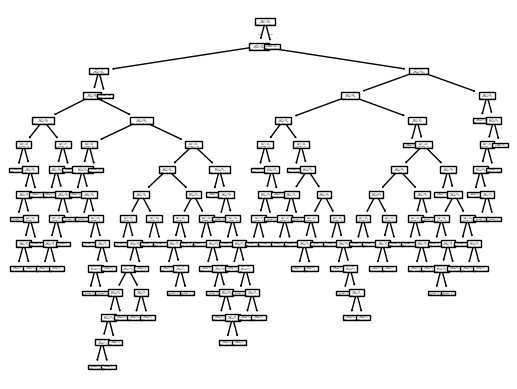

In [86]:
from sklearn import tree 

tree.plot_tree(clf.fit(x_train,y_train))

In [93]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         acc       0.30      0.30      0.30       155
        good       0.00      0.00      0.00        29
       unacc       0.85      0.86      0.85       480
       vgood       0.00      0.00      0.00        28

    accuracy                           0.66       692
   macro avg       0.29      0.29      0.29       692
weighted avg       0.65      0.66      0.66       692

